# Tarea 7: Ecuaciones diferenciales ordinarias



**Equipo:**

- 
- 

La tarea está dividida en 2, la parte "aburrida" pero necesaria, de medir la calidad de los algoritmos y e implementar las mejoras a los algoritmos, y la parte de aplicar lo aprendido a resolver sistemas de ecuaciones diferenciales interesantes.

En total hay 12 puntos, aunque la tarea se calificará sobre 10. La primera parte son 4 ejercicios que sólo valen 5 puntos en total. Te recomiendo hacerlos aunque sean más aburridos y valgan menos, porque 1. Son más fáciles y 2. Te servirán en tareas y trabajos futuros (quizá con excepción del 1, pero el 1 es extra fácil). 

El problema 2-3, puede hacerse usando TaylorSeries y el algorimo se vuelve súper eficiente, impresionantemente. Ese algoritmo es el que se usa para estimar la probabilidad de que un asteroide choque contra la tierra. O sea, ya estarían en nivel NASA si hacen ese problema bien ;-). 

Sobre la parte de aplicaciones. El problema 8-11 es por mucho el más difícil. Estudiar sistemas caóticos es siempre difícil, porque requieren muy buena presición. Eso no significa sólo reducir la $h$, sino utilizar los mejores algoritmos y muy cuidadosamente. También tener una buena idea de qué conviene graficar y muy frecuentemente, re-ajustar la energía para que no diverja. Por desgracia para ese problema no se puede aplicar un algoritmo simpléctico, que sería lo ideal. La recomendación entonces es que se aseguren que durnate el tiempo de su simulación la energía se mantenga constante. Para pensar cómo mantenerla constante, escriban en una hoja las ecuaciones diferenciales. 

## Parte 1: algoritmos


[1] Compara los errores y tiempos de medición de 3 métodos para resolver ecuaciones diferenciales. Para esto elige 2 ecuaciones diferenciales de las que tengas la solución. Por ejemplo, puede ser la ecuación logística y la ecuación $y' = y$, cuya solución es una exponencial, pero puedes usar otras si quieres.

(i) Obten el error relativo $|y_r(t)-y_e(t)|/|y_r(t)|$, donde $y_r$ es la solución analítica y $y_e$ es la solución estimada para cada método como función de $t$. Grafíca los 3 errores relativos como función de $t$ para cada una de las 2 ecuaciones diferenciales que elegiste. Es decir, espero 2 gráficas (una por ecuación), cada una con 3 curvas (una por método). 


(ii) Mide el tiempo de cómputo con los 3 métodos para ambas ecuaciones como función de $h$ (elige un rango de $t$ pequeño para que no tarde demasiado tu medición). Para esto no es necesario que uses Benchmarktools, basta con @elapse (Benchmarktools es lo mejor, pero puede ser muy tardado). Igual espero 2 gráficas con 3 curvas cada una.   

[2-3] Generalizar a varias variables el algoritmo de Taylor utilizando SymPy. Pruébalo con la algún sistema de ecuaciones diferenciales cualquiera del que conozcas su solución. 

**Nota:** También es válido que revises la documentación de la paquetería TaylorSeries y puedas resolver un sistema de ecuaciones diferenciales con esa paquetería sin usar SymPy, de hecho tendrá un reconocimiento especial (tomaré en cuenta algún extra en la calificación) si logras resolverlo vía TaylorSeries (y de hecho quizá es más fácil). 

[4] (i) Modifica el algoritmo de Adams-Bashforth para considerar paso variable. Para esto es necesario que se calcule la sexta derivada de la función. Esto lo puedes hacer con un método numérico (recuerda que los métodos numéricos fallan si usas $h << 1$), usando la técnica de los coefcientes para obtener la derivada en un solo paso, o vía TaylorSeries si ya tienes práctica con la paquetería. 

(ii) Prueba este algoritmo para un sistema de ecuaciones diferenciales (el que quieras, pero del cual conozcas su solución). 

[5] Implementa el algoritmo simpléctico de Verlet (ver  [<em>este artículo de wikipedia<em>](https://en.wikipedia.org/wiki/Symplectic_integrator)). Compara el error de este método con el error por un método RK de orden 2. Compáralo como función de $h$ y como función del número de pasos de integración. Usa el problema de Kepler para esta comparación. 

## Parte 2: aplicaciones 


[6-7] (i) Utilizar el método de Euler simple para hacer una (animación) simulación del movimiento browniano de $5$ partículas con un potencial de interacción $U(r)$ de [<em>Lennard-Jones (LJ)<em>](https://es.wikipedia.org/wiki/Potencial_de_Lennard-Jones). Usa $\epsilon = 1$, $\sigma = 1$, una fuerza de fricción $-\gamma \vec{v}$ y una fuerza externa aleatoria con distribución estandar multiplicada por $\sqrt{k_B T \gamma}$, donde $k_B T$ es la energía términca y $\gamma$ es el coeficiente de fricción del fluido. 
Utiliza $\gamma = 0.1$ y condiciones iniciales de tal forma que las partículas inicialmente se encuentre a una distancia mayor a $1$ y menor que $2$ de su vecino más cercano y una distancia menor que $5$ de su vecino más lejano (por ejemplo, pon las partículas en los vértices de un pentágono de lado 1.5 inicialmente). 

(ii) Repite la simulación con las mismas condiciones iniciales y parámetros, excepto por $k_B T$. El potencial de LJ tiende a juntar las partículas, mientras que la fuerza térmica tiende a separarlas ¿a partir de qué valor de $k_B T$ se empieza a ver que las partículas tienden a separarse (y no juntarse)?. Para responder esto grafica la distancia promedio de las partículas como función del tiempo para cada $k_B T$. 


**Nota1:** El potencial de LJ crece abruptamente para partículas que se encuentran cercanas, volviéndose MUY repulsivo. Para que las partículas no salgan disparadas por eso, puedes 1. reducir muchísimo tu paso de tiempo, 2. Usar un método simpléctico, 3. Poner un cutoff para la rapidez de las partículas o equivalentemente poner un máximo en la repulsividad del potencial.
    
**Nota2:** No necesitas responder, pero piensa al respecto. ¿Crees que la $k_B T$ crítica depende de las condiciones iniciales? Los coloides (como la sangre o la gelatina) se pueden simular razonablemente con dinámica Browniana como esta (sólo que con decenas de miles de partículas y con condiciones periódicas a la frontera). ¿Qué crees que signifique la $k_B T$ crítica?

[8] **(fácil y bonito)** Uno de los primeros modelos de neuronas que se hizo fue el de Hodgkin–Huxley por el cual ambos recibieron el premio Nobel en 1963 y hoy en día este modelo sigue usándose para estudiar el comportamiento de las neuronas en el cerebro. Este modelo considera a cada neurona como un circuito eléctrico donde la superficie de la célula forma un capacitor, y dentro tiene una serie de canales de sodio y potacio que efectivamente forman 3 tipos de resistencias variables (dependen del voltage). 

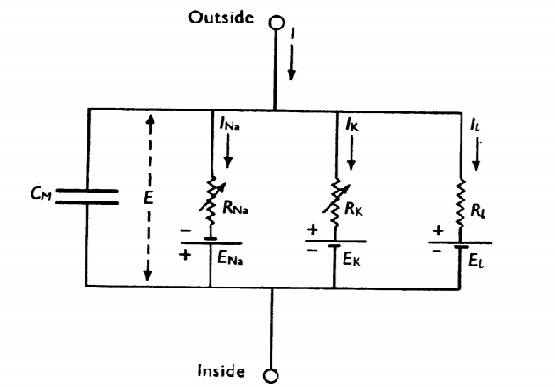

En este circuito las $E_{algo}$ son constantes, igual que $C_m$ y $g_l$. Pero las $g_{Na}$ y $g_K$ no son constantes. Sin embargo se pueden expresar como funciones de los canales de conducción $n$, $m$ y $h$ que representan los canales de potacio, sodio y de fuga respectivamente. Al final la ecuación diferencial que define este circuito es: 
  
$$I = C_m \frac{dV_m}{dt} +g_K n^4 (V_m -V_K) + g_{Na} m^3 h (V_m - V_{Na}) + g_l (V_m -V_l).$$

Aquí $g_K$ y $g_{Na}$ ya son constantes (en realidad son los promedios de las conductividades de potacio y sodio respectivamente). $n$, $m$ y $h$ por otra parte está modelados por: 

$$\frac{dn}{dt} = \alpha_n(V_m) (1-n) - \beta_n(V_m) n, $$

$$\frac{dm}{dt} = \alpha_m(V_m) (1-m) - \beta_m(V_m)m, $$

$$\frac{dh}{dt} = \alpha_h(V_m) (1-h) - \beta_h(V_m)h, $$

donde $\alpha_n(V_m) = \frac{0.01 (V_m+55)}{1-e^{-(V_m+55)/10}}$, 
$\alpha_m(V_m) = \frac{0.1 (V_m+40)}{1-e^{(V_m+40)/10}}$,
$\alpha_h(V_m) = 0.07 e^{-(V_m+65) /20}$, 
$\beta_n(V_m) = 0.125 e^{(V_m+65)/80}$, 
$\beta_m(V_m) = 4 e^{-(V_m+65)/18}$ y 
$\beta_h(V_m) = \frac{1}{e^{(30+V_m)/10}+1}$. 

En su artículo Hodgkin y Huxley utilizan los valores $C_m = 1.0$, $V_K \approx -77$, $V_{Na} \approx -50$, $V_l \approx -54.4$, $g_K \approx 36 $, $g_{Na}\approx 120 $ y $g_l \approx 0.3$. 

Luego hace una serie de trucos para encontrar estados estacionarios, pero esos por ahora no nos interesan. 

La idea es que hagan una función que mediante algún método (por ejemplo Adams-Bashforth de paso variable o RK4) resuelva esta ecuación dado un rango de tiempo, la función de corriente de entrada $I(t)$ y los valores  $C_m$, $v_K$, $V_{Na}$, $V_l$, $g_K$, $g_{Na}$ y $g_l$ prefijados en $C_m = 1.0$, $V_K = -77$, $V_{Na} = 50$, $V_l = -54.4$, $g_K = 36$, $g_{Na} = 120$, $g_l = 0.3$, que por alguna razón (que ya no recuerdo) son los que probé (en vez de los del artículo de Hodkin y Huxley) y por lo tanto sé que les saldrán bonitas las gráficas.  

Grafica $V_m$ contra $t$ y los $\alpha_{algo}$ contra $t$ para una función $I(t) = const = $ (. Haz también una una animación de como cambia la gráfica de $V_m$ como función de la constante $const$. ¿Para qué corriente se "ilumina" (forma una serie de spikes) la neurona?

**Nota:** Este modelo permite en principio conectar varias neuronas en una red. Entonces, se activa una neurona cualquiera con un potencial inicial suficientemente grande. Eso generará un potencial de salida (y corriente) que activará otras neuronas y así se puede propagar una "onda cerebral". Hay marcapasos cerebrales que simplificadamente detectan determinadas ondas cerebrales y con este modelo generan una "onda inversa" que anule (parte de) la primera. El propósito de estos marcapasos es eliminar sobre-exitación de algunas neuronas que tienen como efecto generar temblorina (resultado de Parkinson). Pueden ver un video de como se ven en funcionamiento estos marcapasos aquí (es INCREÍBLE): https://www.youtube.com/watch?v=34XP72FuvnQ.  

[9-11] **(Largo-dificultad media)** (i) Escribe las ecuaciones de movimiento del péndulo (No tienes que deducir tú todas las ecuaciones, puedes basarte por ejemplo en: https://diego.assencio.com/?index=e5ac36fcb129ce95a61f8e8ce0572dbf) y con ello haz una función que utilice el método de Adams-Bashforth (o mejor aún si es con paso variable) para resolver estas ecuaciones de movimiento y así poder simular el péndulo doble dados los parámetros (longitudes y masas), las condiciones iniciales y el rango de tiempo de la simulación. La función debe arrojar los valores de las posiciones (ángulos) y velocidades (angulares) de cada masa como arreglos.  

(ii) Con la función que hiciste en (i) y la función del Hamiltoniano, haz una gráfica de la energía vs $t$ para diferentes condiciones iniciales. Asegúrate que se mantenga prácticamente constante la energía. Juega un poco para ver descubrir en qué condiciones la energía no se mantiene (¿qué condiciones iniciales, qué valores de $h$, qué tiempos?). Haz también una animación de tu péndulo doble para asegurarte que se vea realista (y que no hace cosas raras). 

Ahora queremos poder visualizar el espacio fase para diferentes condiciones iniciales. El péndulo doble se puede describir utilizando 2 ángulos y 2 momentos angulares. Esto significa que su espacio fáse es 4-dimensional. Por supuesto, un espacio 4D no es posible visualizarlo. Si fijamos la energía del sistema, una de las variables queda determinada en términos de la otras: 

(iii) Utilizando las ecuaciones de Hamilton (y el Hamiltoniano del péndulo doble), escribe las 3 ecuaciones diferenciales que determinan al sistema al escribir el momento angular de la segunda masa del péndulo $p_{\theta_2}$ en términos de la energía $H$, el momento angular de la priemera masa $p_{\theta_1}$, el ángulo de la primera masa $\theta_1$ y el ángulo de la segunda masa $\theta_2$. Si usaste el vínculo de arriba, simplemente tienes que despejar $p_{\theta_2}$ de la ecuación de H (ecuación 13 del vínculo), después sustituir $p_{\theta_2}$ en las ecuaciones de movimiento (ecuaciones 14, 15 y 16, (la 17 ya no es necesaria!, queda sustituída por el despeje de la ecuación 13)) para que todas queden en términos de $\theta_1$, $\theta_2$ y $p_{\theta_1}$. 

Visualizar un espacio fase 3D sigue siendo difícil. Una alternativa es hacer un mapeo de Poincaré, es decir, "seguir" la trayectoria del sistema en el espacio fase y observar cuándo curza un determinado plano y sólo graficar los puntos de ese plano (el corte del espacio fase). Por ejemplo, fiajrnos cuándo $\theta_2 = 0$ y cuando eso suceda poner un punto en el plano $\theta_1, p_{\theta_1}$.

(iv) Utilizando el método de Newton-Raphson y la solución al sistema de ecuaciones diferenciales, haz una función para resolver el sistema de ecuaciones del punto (iii) (dada una energía y un valor de $\theta_2$ prefijado en $0$). Con esta función calcula la intersección del espacio fase para un $H$ dado y el plano $\theta_2 = 0$ durante un tiempo suficiente largo como para tener al menos 1000 puntos de la intersección (mapeo de Poincaré), aunque entre más puntos mejor.  Prueba repetir esto para varias condiciones iniciales con la misma energía (unas 10-15 condiciones iniciales diferentes), graficando cada mapa de Poincaré encima del anterior. 

(v) Obtén el mapeo de Poincaré para varias energías (para cada energía una gráfica nueva con unas 10-15 trayectorias). Comienza por una energía relativamente pequeña (casi debería verse la simulación como un péndulo normal), y llega a una energía de tal forma que $\theta_1$ pueda recorrer $2\pi$ (o sea, que el péndulo pueda llegar a dar la vuelta completa). Grafica todos los mapeos de poincaré en una misma gráfica, pero cada mapeo hazlo con un color diferente (usa una escala de colores que dependa de la energía).    

De ver el mapeo de Poincaré para cada energía, ¿puedes identificar para qué valores de la energía el sistema es caótico y para que valores no lo es?

**Nota 1:** Lo mejor sería poder utilizar métodos simplécticos, por desgracia el sistema no es separable y por lo tanto es muy difícil implementar la parte simpléctica y ni siquiera funciona bien cuando el sistema se vuelve caótico (ver https://arxiv.org/pdf/1609.02212.pdf). Hay alternativas, por ejemplo constreñir la energía del sistema, lo que significa que cada cierto número de pasos se corrige la velocidad angular de las partículas para que la energía se mantengan constante, pero cómo elegir en qué forma se hace la corrección de las velocidades es todo una discusión. 

**Nota 2:** Lwa recomiendo (no es obligatorio) hacer 3 animaciones del péndulo (y no 1), una para una energía muy pequeña, uno para una energía justo antes de que se vuelva caótico el sistema y uno para cuando el sistema es caótico. ¿cuál te gusta más (es más hinotizante) su movimiento? (y ¿por qué te gusta más?). Aunque el gusto es algo subjetivo, en realidad sí hay una razón de porque en general a la gente le gusta más un tipo de movimientos que otros. 

**Nota 3:** No necesitas responder, pero piénsa al respecto: ¿Crees que sea importante la longitud y masas de los péndulos? ¿Hay sistemas para los que el péndulo se mantiene no-caótico para un mayor número de valores? Si sí, ¿Hay algún péndulo doble que sea el "menos caótico de todos" y alguno que sea el "más caótico de todos"? 


[12] Revisa aquí: https://modelo.covid19.cdmx.gob.mx/modelo-epidemico el modelo epidemeológico de la CDMX. Escribe las ecuaciones, con los parámetros que ahí dan y resuelve el modelo con algún solucionador "bueno". 

**Nota:** ¿La simulación se acerca algo a lo que sucedió en la ciudad? ¿Al menos se acerca a los primeros meses? ¿Cómo se podría mejorar este modelo? ¿cual es el error de fondo de estos modelos epidemeológicos?